In [133]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display_html
import os
import sys

sys.path.append(os.getcwd() + '/modules')
import functions

%matplotlib inline
from functions import *

In [134]:
raw_df = pd.read_csv('Data/winemag-data-130k-v2 copy.csv')

In [135]:
nodup_df = raw_df.drop_duplicates(subset='title', keep='first')

In [136]:
nodup_df = nodup_df.drop(['Unnamed: 0', 'region_1', 'region_2'], axis=1)

In [137]:
nodup_df.shape

(118840, 11)

In [138]:
nodup_df = nodup_df.dropna()

In [139]:
nodup_df.shape

(59906, 11)

In [140]:
nodup_df.head()

country                                        description  \
1  Portugal  This is ripe and fruity, a wine that is smooth...   
4        US  Much like the regular bottling from 2012, this...   
5     Spain  Blackberry and raspberry aromas show a typical...   
6     Italy  Here's a bright, informal red that opens with ...   
9    France  This has great depth of flavor with its fresh ...   

                          designation  points  price           province  \
1                            Avidagos      87   15.0              Douro   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   
5                        Ars In Vitro      87   15.0     Northern Spain   
6                             Belsito      87   16.0  Sicily & Sardinia   
9                         Les Natures      87   27.0             Alsace   

         taster_name taster_twitter_handle  \
1         Roger Voss            @vossroger   
4       Paul Gregutt           @paulgwine    
5  Michael Schachner           @wineschach   
6      Kerin O’Keefe          @kerinokeefe   
9         Roger Voss            @vossroger   

                                               title             variety  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   
6   Terre di Giurfo 2013 Belsito Frappato (Vittoria)            Frappato   
9  Jean-Baptiste Adam 2012 Les Natures Pinot Gris...          Pinot Gris   

                winery  
1  Quinta dos Avidagos  
4         Sweet Cheeks  
5               Tandem  
6      Terre di Giurfo  
9   Jean-Baptiste Adam

In [141]:
#df = nodup_df[nodup_df['price'] >= 500].index

In [142]:
#nodup_df = nodup_df.drop(df, inplace=True)

In [143]:
#nodup_df.shape

In [144]:
clean_df = nodup_df.drop(nodup_df[nodup_df['price'] >= 500].index)

In [145]:
clean_df.shape

(59861, 11)

In [146]:
clean_df.head()

country                                        description  \
1  Portugal  This is ripe and fruity, a wine that is smooth...   
4        US  Much like the regular bottling from 2012, this...   
5     Spain  Blackberry and raspberry aromas show a typical...   
6     Italy  Here's a bright, informal red that opens with ...   
9    France  This has great depth of flavor with its fresh ...   

                          designation  points  price           province  \
1                            Avidagos      87   15.0              Douro   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   
5                        Ars In Vitro      87   15.0     Northern Spain   
6                             Belsito      87   16.0  Sicily & Sardinia   
9                         Les Natures      87   27.0             Alsace   

         taster_name taster_twitter_handle  \
1         Roger Voss            @vossroger   
4       Paul Gregutt           @paulgwine    
5  Michael Schachner           @wineschach   
6      Kerin O’Keefe          @kerinokeefe   
9         Roger Voss            @vossroger   

                                               title             variety  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   
6   Terre di Giurfo 2013 Belsito Frappato (Vittoria)            Frappato   
9  Jean-Baptiste Adam 2012 Les Natures Pinot Gris...          Pinot Gris   

                winery  
1  Quinta dos Avidagos  
4         Sweet Cheeks  
5               Tandem  
6      Terre di Giurfo  
9   Jean-Baptiste Adam

In [147]:
clean_df

country                                        description  \
1          Portugal  This is ripe and fruity, a wine that is smooth...   
4                US  Much like the regular bottling from 2012, this...   
5             Spain  Blackberry and raspberry aromas show a typical...   
6             Italy  Here's a bright, informal red that opens with ...   
9            France  This has great depth of flavor with its fresh ...   
10               US  Soft, supple plum envelopes an oaky structure ...   
16        Argentina  Baked plum, molasses, balsamic vinegar and che...   
17        Argentina  Raw black-cherry aromas are direct and simple ...   
18            Spain  Desiccated blackberry, leather, charred wood a...   
22            Italy  Delicate aromas recall white flower and citrus...   
23               US  This wine from the Geneseo district offers aro...   
24            Italy  Aromas of prune, blackcurrant, toast and oak c...   
25               US  Oak and earth intermingle around robust aromas...   
26            Italy  Pretty aromas of yellow flower and stone fruit...   
28            Italy  Aromas suggest mature berry, scorched earth, a...   
35               US  As with many of the Erath 2010 vineyard design...   
36            Chile  White flower, lychee and apple aromas carry th...   
42           France  This is a festive wine, with soft, ripe fruit ...   
49           France  Soft and fruity, this is a generous, ripe wine...   
51            Chile  This is much different than Casa Silva's 2009 ...   
53           France  Fruity and lightly herbaceous, this has fine t...   
58            Chile  Lightly herbal strawberry and raspberry aromas...   
60               US  Syrupy and dense, this wine is jammy in plum a...   
61            Italy  This densely hued wine has aromas of black plu...   
62               US  The aromas are brooding, with notes of barrel ...   
63           France  This fat, yeasty Champagne is comprised predom...   
64               US  There are intriguing touches to the nose of th...   
67               US  A blend of Merlot and Cabernet Franc, this win...   
69           France  This cooperative, based in Aÿ, has benefited f...   
71               US  Big oak defines this robustly dense and extrac...   
...             ...                                                ...   
129926           US  This pure Syrah from Reininger's estate vineya...   
129928        Spain  This represents Torres' highest effort in Prio...   
129930        Spain  Arguably on the heavy and rich side, but if yo...   
129932    Argentina  Andeluna's top wines tend to be ripe and plump...   
129933      Austria  Bründlmayer makes a particularly felicitous br...   
129934      Austria  You can feel the unctuous, oily richness as so...   
129936       France  A blend from several premier cru vineyards in ...   
129937      Austria  Smooth, creamy aromas are followed by a rich, ...   
129938    Argentina  Compared to the regular 2006 Malbec from Chaka...   
129939      Austria  A true TBA, its very rich, toffee-flavored, in...   
129943        Italy  A blend of Nero d'Avola and Syrah, this convey...   
129944       Israel  Deep garnet in the glass, this has a nose of b...   
129945           US  Hailing from one of the more popular vineyards...   
129947        Italy  A blend of 65% Cabernet Sauvignon, 30% Merlot ...   
129948    Argentina  Raspberry and cassis aromas are fresh and upri...   
129949           US  There's no bones about the use of oak in this ...   
129950           US  This opens with herbaceous dollops of thyme an...   
129951       France  Hugely spicy this rich wine is described as sw...   
129953  New Zealand  Roughly two-thirds Cabernet and one-third Merl...   
129954  New Zealand  One of the more characterful Pinot Gris for th...   
129956  New Zealand  The blend is 44% Merlot, 33% Cabernet Sauvigno...   
129957        Spain  Lightly baked berry aromas vie for attention w...   
129958  New Zeal

In [162]:
set(clean_df.variety)

{'Abouriou',
 'Agiorgitiko',
 'Aglianico',
 'Aidani',
 'Airen',
 'Albana',
 'Albanello',
 'Albariño',
 'Aleatico',
 'Alfrocheiro',
 'Alicante',
 'Alicante Bouschet',
 'Aligoté',
 'Alsace white blend',
 'Altesse',
 'Alvarelhão',
 'Alvarinho',
 'Alvarinho-Chardonnay',
 'Antão Vaz',
 'Apple',
 'Aragonez',
 'Aragonês',
 'Argaman',
 'Arinto',
 'Arneis',
 'Assyrtico',
 'Assyrtiko',
 'Athiri',
 'Austrian Red Blend',
 'Austrian white blend',
 'Auxerrois',
 'Avesso',
 'Azal',
 'Babić',
 'Babosa Negro',
 'Baco Noir',
 'Baga',
 'Baga-Touriga Nacional',
 'Barbera',
 'Barbera-Nebbiolo',
 'Bastardo',
 'Bical',
 'Black Muscat',
 'Blauer Portugieser',
 'Blaufränkisch',
 'Bobal',
 'Bobal-Cabernet Sauvignon',
 'Bonarda',
 'Bordeaux-style Red Blend',
 'Bordeaux-style White Blend',
 'Bovale',
 'Boğazkere',
 'Braucol',
 'Bual',
 'Cabernet',
 'Cabernet Blend',
 'Cabernet Franc',
 'Cabernet Franc-Cabernet Sauvignon',
 'Cabernet Franc-Carmenère',
 'Cabernet Franc-Malbec',
 'Cabernet Franc-Merlot',
 'Cabernet 

In [208]:
data = clean_df[clean_df.groupby('variety').variety.transform(len) >= 100]

In [209]:
data.shape

(53950, 11)

In [210]:
len(data.variety.value_counts())

55

In [228]:
province_df = pd.DataFrame(data.province.value_counts())

In [229]:
province_df.head()

province
California           12093
Washington            5127
Oregon                3379
Northern Spain        2399
Mendoza Province      2095

In [242]:
province_df.columns


Index(['province'], dtype='object')

In [235]:
province_df['pct_change'] = df.province.pct_change()
province_df['log_return'] = np.log(1 + df.pct_change)

AttributeError: 'Int64Index' object has no attribute 'province'

province
California           12093
Washington            5127
Oregon                3379
Northern Spain        2399
Mendoza Province      2095

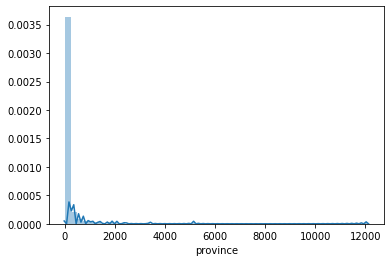

In [222]:
sns.distplot(province_df['province'])
#plt.savefig('Images_Graphs/cheap_wine_dist.png', transparent=True, dpi=150, bbox_inches='tight')

Text(0, 0.5, 'Number of Instances')

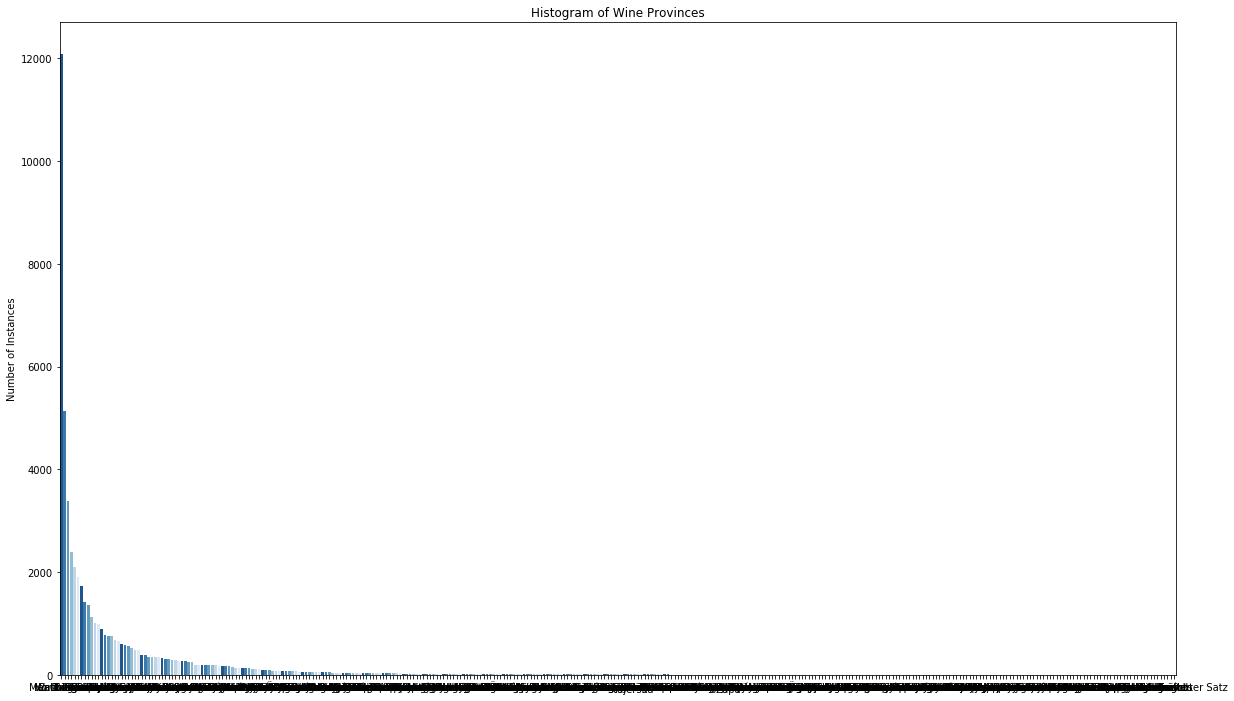

In [227]:
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
sns.barplot(x=province_df['province'].index, y=province_df['province'], ax=ax, palette=sns.color_palette("Blues_r"))

plt.title("Histogram of Wine Provinces")
plt.ylabel("Number of Instances")
#plt.xlabel("Provinces")


In [ ]:
sns.distplot(data['province'].value_counts())

In [203]:
data = data[data.groupby('country').country.transform(len) >= 10]

In [204]:
data.shape

(53902, 11)

In [205]:
len(data.variety.value_counts())

55

In [206]:
len(data.country.value_counts())

28

In [207]:
len(data.province.value_counts())

315